In [ ]:
# pip install matplotlib==3.4.2

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


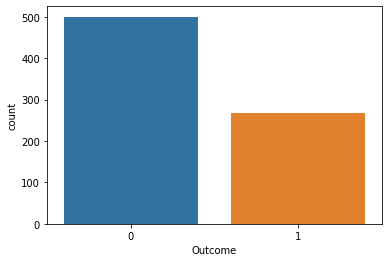

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# DATA FOR PRED
data=pd.read_csv("/content/diabetes.csv")
print(data.head())
data['Outcome'].value_counts()
seaborn.countplot(data['Outcome'])

# **Check null Value**

In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().values.any()

False

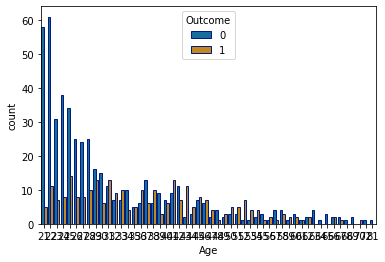

In [ ]:
seaborn.countplot(x='Age',hue='Outcome',data=data,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

# Check 0 in column

In [ ]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Fill 0 value with mean value

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
data = data.interpolate()

In [ ]:
data=data.dropna()

In [ ]:
# data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
# data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
# data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
# data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
# data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

# Check

In [ ]:
(data['Glucose']==0).sum()

0

# Data details in dataset

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.840523,121.425490,72.350327,29.076471,159.045098,32.483529,0.471570,33.223529,0.347712
std,3.370364,30.481869,12.225928,9.903924,111.597578,6.892014,0.331823,11.767311,0.476556
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,88.000000,27.500000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,190.500000,36.600000,0.624000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Checking correlation**

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.124863,0.197204,0.086081,0.114426,0.022914,-0.035364,0.544789,0.218742
Glucose,0.124863,1.000000,0.218942,0.184653,0.363819,0.235013,0.136750,0.267875,0.487590
BloodPressure,0.197204,0.218942,1.000000,0.174956,0.050052,0.272801,-0.004853,0.318773,0.162157
SkinThickness,0.086081,0.184653,0.174956,1.000000,0.139070,0.495170,0.102968,0.129844,0.196523
Insulin,0.114426,0.363819,0.050052,0.139070,1.000000,0.136288,0.100157,0.161513,0.188257
BMI,0.022914,0.235013,0.272801,0.495170,0.136288,1.000000,0.158025,0.025355,0.315558
DiabetesPedigreeFunction,-0.035364,0.136750,-0.004853,0.102968,0.100157,0.158025,1.000000,0.032742,0.172145
Age,0.544789,0.267875,0.318773,0.129844,0.161513,0.025355,0.032742,1.000000,0.236802
Outcome,0.218742,0.487590,0.162157,0.196523,0.188257,0.315558,0.172145,0.236802,1.000000


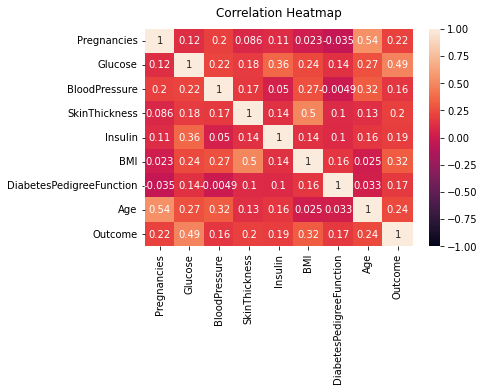

In [ ]:
heatmap = seaborn.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Seperate the data in 2

In [ ]:
x=data.iloc[:,:8]
y=data[["Outcome"]]
x
y

,Outcome
3,0
4,1
5,0
6,1
7,0
...,...
763,0
764,0
765,0
766,1


# Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=1)
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
389,3,100.0,68.0,23.000000,81.000000,31.60,0.949,28
178,5,143.0,78.0,39.000000,120.500000,45.00,0.190,47
107,4,144.0,58.0,28.000000,140.000000,29.50,0.287,37
684,5,136.0,82.0,30.333333,171.666667,32.75,0.640,69
643,4,90.0,76.0,26.750000,140.250000,28.00,0.610,31
...,...,...,...,...,...,...,...,...
648,11,136.0,84.0,35.000000,130.000000,28.30,0.260,42
718,1,108.0,60.0,46.000000,178.000000,35.50,0.415,24
75,1,70.5,48.0,20.000000,225.777778,24.70,0.140,22
238,9,164.0,84.0,21.000000,150.400000,30.80,0.831,32


In [ ]:
data.iloc[389]

Pregnancies                   1.000
Glucose                     131.000
BloodPressure                64.000
SkinThickness                14.000
Insulin                     415.000
BMI                          23.700
DiabetesPedigreeFunction      0.389
Age                          21.000
Outcome                       0.000
Name: 392, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
scaler = MinMaxScaler()
scaler.fit(xtrain[cols_to_scale])
xtrain[cols_to_scale] = scaler.transform(xtrain[cols_to_scale])
xtest[cols_to_scale] = scaler.transform(xtest[cols_to_scale])

In [ ]:
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
460,9,120.0,72.0,22.000000,56.000000,20.8,0.733,48
151,4,114.0,65.0,39.000000,179.500000,21.9,0.432,37
745,12,100.0,84.0,33.000000,105.000000,30.0,0.488,46
529,0,111.0,65.0,24.500000,147.000000,24.6,0.660,31
403,9,72.0,78.0,25.000000,113.666667,31.6,0.280,38
...,...,...,...,...,...,...,...,...
754,8,154.0,78.0,32.000000,310.000000,32.4,0.443,45
337,5,115.0,76.0,37.000000,199.000000,31.2,0.343,44
355,9,165.0,88.0,30.666667,125.666667,30.4,0.302,49
723,5,117.0,86.0,30.000000,105.000000,39.1,0.251,42


In [ ]:
X_train=xtrain
y_train=ytrain
X_test=xtest
y_test=ytest

# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
x_train=xtrain
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('Random',RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))


LR: 0.769646 (0.073280)
LR
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.76      0.47      0.58        53

    accuracy                           0.76       153
   macro avg       0.76      0.70      0.71       153
weighted avg       0.76      0.76      0.75       153



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Random: 0.753279 (0.053700)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Random
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.58      0.65        53

    accuracy                           0.78       153
   macro avg       0.77      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153

GNB: 0.740137 (0.052572)
GNB
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.53      0.62        53

    accuracy                           0.77       153
   macro avg       0.76      0.71      0.73       153
weighted avg       0.77      0.77      0.76       153

SVM: 0.748414 (0.072339)
SVM
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       100
           1       0.71      0.45      0.55        53

    accuracy                           0.75       153
   macro avg       0.73      0.68      0.69       153
weighted 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


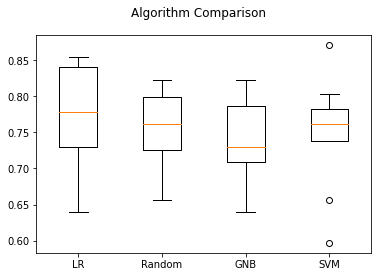

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name,model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = model_selection.cross_val_score(model, xtrain, ytrain.ravel(), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	clf = model.fit(xtrain,ytrain.ravel())
	y_pred = clf.predict(xtest)
	print(name)
	print(classification_report(ytest, y_pred))

# k=KMeans(n_clusters=len(np.unique(ytrain)), random_state=0)
# k.fit(x_train)
# kAccuracy=k.predict(xtest)

# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(ytest,kAccuracy)
# # print(confusion_matrix)
# KAccuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/(confusion_matrix[0,0]+confusion_matrix[0,1]+confusion_matrix[1,0]+confusion_matrix[1,1])
# results.append(KAccuracy)
# print("KMeans")
# print(classification_report(ytest,kAccuracy))
# names.append("KMeans")
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy=0.2)

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(xtrain.astype('float'),ytrain)


# LogisticRegression

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = LogisticRegression(solver='liblinear')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("logreg Train Accuracy: ",modelTrainAccuracy)
    print("logreg Test Accuracy: ",modelTestAccuracy)

# for k in k_values:
# 	# define pipeline
# 	model = RandomForestClassifier()
# 	over = SMOTE(sampling_strategy=0.8,k_neighbors=k)
	
# 	randomTestAccuracy=random.score(xtest,ytest)
#   randomTrainAccuracy=random.score(X_train_smote, y_train_smote)
#   print(randomTestAccuracy)
#   print(randomTrainAccuracy)
	

For ratio  0.6
k-->  1
logreg Train Accuracy:  0.7577092511013216
logreg Test Accuracy:  0.7565217391304347
k-->  2
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  3
logreg Train Accuracy:  0.7591776798825257
logreg Test Accuracy:  0.7565217391304347
k-->  4
logreg Train Accuracy:  0.7474302496328928
logreg Test Accuracy:  0.7565217391304347
k-->  5
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  6
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  7
logreg Train Accuracy:  0.7577092511013216
logreg Test Accuracy:  0.7565217391304347
k-->  8
logreg Train Accuracy:  0.7591776798825257
logreg Test Accuracy:  0.7565217391304347
k-->  9
logreg Train Accuracy:  0.7606461086637298
logreg Test Accuracy:  0.7652173913043478
k-->  10
logreg Train Accuracy:  0.7474302496328928
logreg Test Accuracy:  0.7565217391304347
For ratio  0.7
k-->  1
logreg Train Accuracy:  0.75138

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.744475138121547
logreg Test Accuracy:  0.7652173913043478
k-->  6
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7565217391304347
k-->  7
logreg Train Accuracy:  0.7527624309392266
logreg Test Accuracy:  0.7739130434782608
k-->  8
logreg Train Accuracy:  0.7417127071823204
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7472375690607734
logreg Test Accuracy:  0.7652173913043478
k-->  10
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7739130434782608
For ratio  0.8
k-->  1
logreg Train Accuracy:  0.7532637075718016
logreg Test Accuracy:  0.7739130434782608
k-->  2
logreg Train Accuracy:  0.7506527415143603
logreg Test Accuracy:  0.782608695652174
k-->  3
logreg Train Accuracy:  0.7519582245430809
logreg Test Accuracy:  0.7652173913043478
k-->  4
logreg Train Accuracy:  0.7362924281984334
logreg Test Accuracy:  0.7913043478260869
k-->  5
logreg Train Accuracy:  0.737597911227154
logreg Test Accuracy:  0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.7545691906005222
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7545691906005222
logreg Test Accuracy:  0.7739130434782608
k-->  10
logreg Train Accuracy:  0.7571801566579635
logreg Test Accuracy:  0.7739130434782608
For ratio  0.9
k-->  1
logreg Train Accuracy:  0.7503090234857849
logreg Test Accuracy:  0.7478260869565218
k-->  2
logreg Train Accuracy:  0.7490729295426453
logreg Test Accuracy:  0.7913043478260869
k-->  3
logreg Train Accuracy:  0.7379480840543882
logreg Test Accuracy:  0.7652173913043478
k-->  4
logreg Train Accuracy:  0.7466007416563659
logreg Test Accuracy:  0.7913043478260869
k-->  5
logreg Train Accuracy:  0.7342398022249691
logreg Test Accuracy:  0.7652173913043478
k-->  6
logreg Train Accuracy:  0.7367119901112484
logreg Test Accuracy:  0.782608695652174
k-->  7
logreg Train Accuracy:  0.7527812113720643
logreg Test Accuracy:  0.782608695652174
k-->  8
logreg Train Accuracy:  0.7552533992583437
logreg Test A

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.7490729295426453
logreg Test Accuracy:  0.7739130434782608
For ratio  1
k-->  1
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7565217391304347
k-->  2
logreg Train Accuracy:  0.7511737089201878
logreg Test Accuracy:  0.7652173913043478
k-->  3
logreg Train Accuracy:  0.7382629107981221
logreg Test Accuracy:  0.7565217391304347
k-->  4
logreg Train Accuracy:  0.7535211267605634
logreg Test Accuracy:  0.782608695652174
k-->  5
logreg Train Accuracy:  0.7406103286384976
logreg Test Accuracy:  0.7304347826086957
k-->  6
logreg Train Accuracy:  0.7488262910798122
logreg Test Accuracy:  0.7478260869565218
k-->  7
logreg Train Accuracy:  0.755868544600939
logreg Test Accuracy:  0.7739130434782608
k-->  8
logreg Train Accuracy:  0.7453051643192489
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7617370892018779
logreg Test Accuracy:  0.782608695652174
k-->  10
logreg Train Accuracy:  0.755868544600939
logreg Test Accuracy:  0.765217

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

In [ ]:
over_random = SMOTE(sampling_strategy=0.7,k_neighbors=2,random_state=42)
X_train_smote_lr, y_train_smote_lr = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')

In [ ]:
# y=data[["Outcome"]]
# print(y)
x_train=xtrain
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [ ]:
logisticTestAccuracy=logreg.score(xtest,ytest)
logisticTrainAccuracy=logreg.score(xtrain,ytrain)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)


0.7652173913043478
0.7707692307692308


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
lr_probs = logreg.predict_proba(xtest)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(ytest, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.845


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

In [ ]:
Logpred=logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,Logpred)
print(confusion_matrix)


[[69  4]
 [23 19]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# RandomForestClassifier

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = RandomForestClassifier(random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    randomTestAccuracy=model.score(xtest,ytest)
    randomTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("Random Train Accuracy: ",randomTrainAccuracy)
    print("Random Test Accuracy: ",randomTestAccuracy)
	

For ratio  0.6
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
For ratio  0.7
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7565217391304347
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
For ratio  0.8
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
For ratio  0.9
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
For ratio  1
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7652173913043478
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7565217391304347
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8260869565217391
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8347826086956521
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8521739130434782


In [ ]:
over_random = SMOTE(sampling_strategy=1,k_neighbors=10,random_state=42)
X_train_smote_random, y_train_smote_random = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)

In [ ]:
random.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=42)

In [ ]:
randomTestAccuracy=random.score(xtest,ytest)
randomTrainAccuracy=random.score(xtrain,ytrain)
print(randomTestAccuracy)
print(randomTrainAccuracy)

0.8
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
rf_probs = random.predict_proba(xtest)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(ytest, rf_probs)
print('Random: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)

Random: ROC AUC=0.855


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Randompred=random.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(ytest,Randompred)
print(confusion_matrix1)

[[66  7]
 [16 26]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

for n_estimator in range(1,100):

  model7t = RandomForestClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(X_train_smote_random, y_train_smote_random)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(X_train_smote_random, y_train_smote_random)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

For estimator :  1
Training accuracy:
0.9002347417840375
Test accuracy:
0.6608695652173913
For estimator :  2
Training accuracy:
0.8826291079812206
Test accuracy:
0.6869565217391305
For estimator :  3
Training accuracy:
0.9577464788732394
Test accuracy:
0.7217391304347827
For estimator :  4
Training accuracy:
0.9518779342723005
Test accuracy:
0.7130434782608696
For estimator :  5
Training accuracy:
0.960093896713615
Test accuracy:
0.7304347826086957
For estimator :  6
Training accuracy:
0.9647887323943662
Test accuracy:
0.7304347826086957
For estimator :  7
Training accuracy:
0.9835680751173709
Test accuracy:
0.7652173913043478
For estimator :  8
Training accuracy:
0.9788732394366197
Test accuracy:
0.7739130434782608
For estimator :  9
Training accuracy:
0.9906103286384976
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  10
Training accuracy:
0.9882629107981221
Test accuracy:
0.7304347826086957
For estimator :  11
Training accuracy:
0.994131455399061
Test accuracy:
0.7652173913043478
For estimator :  12
Training accuracy:
0.9917840375586855
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  13
Training accuracy:
0.994131455399061
Test accuracy:
0.7739130434782608
For estimator :  14
Training accuracy:
0.9964788732394366
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  15
Training accuracy:
0.9976525821596244
Test accuracy:
0.7913043478260869
For estimator :  16
Training accuracy:
0.9976525821596244
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  17
Training accuracy:
0.9988262910798122
Test accuracy:
0.7739130434782608
For estimator :  18
Training accuracy:
1.0
Test accuracy:
0.7739130434782608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  19
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  20
Training accuracy:
1.0
Test accuracy:
0.782608695652174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  21
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  22
Training accuracy:
1.0
Test accuracy:
0.7739130434782608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  23
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  24
Training accuracy:
0.9988262910798122
Test accuracy:
0.782608695652174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  25
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  26
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  27
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  28
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  29
Training accuracy:
0.9988262910798122
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  30
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  31
Training accuracy:
0.9988262910798122
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  32
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  33
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  34
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  35
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  36
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  37
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  38
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  39
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  40
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  41
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  42
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  43
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  44
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  45
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  46
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  47
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  48
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  49
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  50
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  51
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  52
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  53
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  54
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  55
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  56
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  57
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  58
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  59
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  60
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  61
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  62
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  63
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  64
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  65
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  66
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  67
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  68
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  69
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  70
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  71
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  72
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  73
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  74
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  75
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  76
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  77
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  78
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  79
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  80
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  81
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  82
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  83
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  84
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  85
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  86
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  87
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  88
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  89
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  90
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  91
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  92
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  93
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  94
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  95
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  96
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  97
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  98
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  99
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


# SVM

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = SVC(probability=True,kernel='rbf')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("svm Train Accuracy: ",knnTrainAccuracy)
    print("svm Test Accuracy: ",knnTestAccuracy)



For ratio  0.6
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7958883994126285
svm Test Accuracy:  0.7478260869565218
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046989720998532
svm Test Accuracy:  0.7478260869565218
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7988252569750367
svm Test Accuracy:  0.7565217391304347
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914831130690162
svm Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914831130690162
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046989720998532
svm Test Accuracy:  0.7652173913043478
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7958883994126285
svm Test Accuracy:  0.7652173913043478
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8002936857562408
svm Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8076358296622613
svm Test Accuracy:  0.782608695652174
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7944199706314243
svm Test Accuracy:  0.7652173913043478
For ratio  0.7
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914364640883977
svm Test Accuracy:  0.8
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7955801104972375
svm Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7928176795580111
svm Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.787292817679558
svm Test Accuracy:  0.8
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7941988950276243
svm Test Accuracy:  0.7652173913043478
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7969613259668509
svm Test Accuracy:  0.782608695652174
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7900552486187845
svm Test Accuracy:  0.782608695652174
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914364640883977
svm Test Accuracy:  0.7913043478260869
k-->  9
svm Train Accuracy:  0.8011049723756906
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7983425414364641
svm Test Accuracy:  0.7913043478260869
For ratio  0.8
k-->  1
svm Train Accuracy:  0.8133159268929504
svm Test Accuracy:  0.8
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8054830287206266
svm Test Accuracy:  0.8
k-->  3
svm Train Accuracy:  0.8015665796344648
svm Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7963446475195822
svm Test Accuracy:  0.7739130434782608
k-->  5
svm Train Accuracy:  0.804177545691906
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7911227154046997
svm Test Accuracy:  0.7913043478260869
k-->  7
svm Train Accuracy:  0.793733681462141
svm Test Accuracy:  0.7913043478260869
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7950391644908616
svm Test Accuracy:  0.8
k-->  9
svm Train Accuracy:  0.8080939947780679
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8028720626631853
svm Test Accuracy:  0.782608695652174
For ratio  0.9
k-->  1
svm Train Accuracy:  0.8046971569839307
svm Test Accuracy:  0.7739130434782608
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8096415327564895
svm Test Accuracy:  0.782608695652174
k-->  3
svm Train Accuracy:  0.799752781211372
svm Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046971569839307
svm Test Accuracy:  0.808695652173913
k-->  5
svm Train Accuracy:  0.8071693448702101
svm Test Accuracy:  0.7739130434782608
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8084054388133498
svm Test Accuracy:  0.782608695652174
k-->  7
svm Train Accuracy:  0.7985166872682324
svm Test Accuracy:  0.8
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8059332509270705
svm Test Accuracy:  0.7478260869565218
k-->  9
svm Train Accuracy:  0.8121137206427689
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8108776266996292
svm Test Accuracy:  0.7913043478260869
For ratio  1
k-->  1
svm Train Accuracy:  0.8004694835680751
svm Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.818075117370892
svm Test Accuracy:  0.8
k-->  3
svm Train Accuracy:  0.8051643192488263
svm Test Accuracy:  0.8173913043478261
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8086854460093896
svm Test Accuracy:  0.7739130434782608
k-->  5
svm Train Accuracy:  0.8204225352112676
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.812206572769953
svm Test Accuracy:  0.7652173913043478
k-->  7
svm Train Accuracy:  0.8098591549295775
svm Test Accuracy:  0.7739130434782608
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8133802816901409
svm Test Accuracy:  0.7478260869565218
k-->  9
svm Train Accuracy:  0.8204225352112676
svm Test Accuracy:  0.7652173913043478
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8157276995305164
svm Test Accuracy:  0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
over_random = SMOTE(sampling_strategy=1,k_neighbors=2,random_state=42)
X_train_smote_svm, y_train_smote_svm = over_random.fit_resample(X_train,y_train)

In [ ]:
 from sklearn.svm import SVC
 svm=SVC(probability=True,kernel='rbf')

In [ ]:
svm.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [ ]:
svmTestAccuracy=svm.score(xtest,ytest)
svmTrainAccuracy=svm.score(xtrain,ytrain)
print(svmTestAccuracy)
print(svmTrainAccuracy)


0.7478260869565218
0.8061538461538461


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
sb_probs = svm.predict_proba(xtest)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(ytest, sb_probs)
print('Svm: ROC AUC=%.3f' % (sb_auc))
# calculate roc curves
sb_fpr, sb_tpr, _ = roc_curve(ytest, sb_probs)

Svm: ROC AUC=0.817


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
SVMpred=svm.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(ytest,SVMpred)
print(confusion_matrix3)

[[68  5]
 [24 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = KNeighborsClassifier(n_neighbors=100)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("knn Train Accuracy: ",knnTrainAccuracy)
    print("knn Test Accuracy: ",knnTestAccuracy)



For ratio  0.6
k-->  1
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7478260869565218
k-->  2
knn Train Accuracy:  0.750367107195301
knn Test Accuracy:  0.7565217391304347
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.750367107195301
knn Test Accuracy:  0.7478260869565218
k-->  4
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7565217391304347
k-->  5
knn Train Accuracy:  0.7547723935389133
knn Test Accuracy:  0.7565217391304347
k-->  6
knn Train Accuracy:  0.7547723935389133
knn Test Accuracy:  0.7565217391304347
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7474302496328928
knn Test Accuracy:  0.7652173913043478
k-->  8
knn Train Accuracy:  0.7533039647577092
knn Test Accuracy:  0.7478260869565218
k-->  9
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7565217391304347
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7415565345080763
knn Test Accuracy:  0.7565217391304347
For ratio  0.7
k-->  1
knn Train Accuracy:  0.7458563535911602
knn Test Accuracy:  0.7565217391304347
k-->  2
knn Train Accuracy:  0.7334254143646409
knn Test Accuracy:  0.7478260869565218
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7361878453038674
knn Test Accuracy:  0.7565217391304347
k-->  4
knn Train Accuracy:  0.7251381215469613
knn Test Accuracy:  0.7739130434782608
k-->  5
knn Train Accuracy:  0.744475138121547
knn Test Accuracy:  0.7391304347826086
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7348066298342542
knn Test Accuracy:  0.7478260869565218
k-->  7
knn Train Accuracy:  0.7472375690607734
knn Test Accuracy:  0.7565217391304347
k-->  8
knn Train Accuracy:  0.738950276243094
knn Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.744475138121547
knn Test Accuracy:  0.7391304347826086
k-->  10
knn Train Accuracy:  0.7430939226519337
knn Test Accuracy:  0.7304347826086957
For ratio  0.8
k-->  1
knn Train Accuracy:  0.7323759791122716
knn Test Accuracy:  0.7652173913043478
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7362924281984334
knn Test Accuracy:  0.782608695652174
k-->  3
knn Train Accuracy:  0.7336814621409922
knn Test Accuracy:  0.7652173913043478
k-->  4
knn Train Accuracy:  0.7284595300261096
knn Test Accuracy:  0.7478260869565218
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7258485639686684
knn Test Accuracy:  0.7913043478260869
k-->  6
knn Train Accuracy:  0.7297650130548303
knn Test Accuracy:  0.7478260869565218
k-->  7
knn Train Accuracy:  0.7428198433420365
knn Test Accuracy:  0.7391304347826086
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7349869451697127
knn Test Accuracy:  0.7478260869565218
k-->  9
knn Train Accuracy:  0.7349869451697127
knn Test Accuracy:  0.7478260869565218
k-->  10
knn Train Accuracy:  0.7362924281984334
knn Test Accuracy:  0.7652173913043478
For ratio  0.9
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7391841779975278
knn Test Accuracy:  0.7652173913043478
k-->  2
knn Train Accuracy:  0.7379480840543882
knn Test Accuracy:  0.7652173913043478
k-->  3
knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7913043478260869
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7913043478260869
k-->  5
knn Train Accuracy:  0.7206427688504327
knn Test Accuracy:  0.7565217391304347
k-->  6
knn Train Accuracy:  0.7317676143386898
knn Test Accuracy:  0.7913043478260869
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7391841779975278
knn Test Accuracy:  0.7565217391304347
k-->  8
knn Train Accuracy:  0.7428924598269468
knn Test Accuracy:  0.782608695652174
k-->  9
knn Train Accuracy:  0.7367119901112484
knn Test Accuracy:  0.7391304347826086
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7652173913043478
For ratio  1
k-->  1
knn Train Accuracy:  0.7394366197183099
knn Test Accuracy:  0.7652173913043478
k-->  2
knn Train Accuracy:  0.7406103286384976
knn Test Accuracy:  0.8
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7312206572769953
knn Test Accuracy:  0.782608695652174
k-->  4
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.7565217391304347
k-->  5
knn Train Accuracy:  0.7183098591549296
knn Test Accuracy:  0.7391304347826086
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7394366197183099
knn Test Accuracy:  0.7739130434782608
k-->  7
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.808695652173913
k-->  8
knn Train Accuracy:  0.7476525821596244
knn Test Accuracy:  0.808695652173913
k-->  9
knn Train Accuracy:  0.7476525821596244
knn Test Accuracy:  0.782608695652174
k-->  10
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.782608695652174


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
over_random = SMOTE(sampling_strategy=0.6,k_neighbors=3,random_state=42)
X_train_smote_knn, y_train_smote_knn = over_random.fit_resample(X_train,y_train)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [ ]:
knTestAccuracy=neigh.score(xtest,ytest)
knTrainAccuracy=neigh.score(xtrain,ytrain)
print(knTestAccuracy)
print(knTrainAccuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7478260869565218
0.7738461538461539


In [ ]:
KNNpred=neigh.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
kn_probs = neigh.predict_proba(xtest)
kn_probs = kn_probs[:, 1]
kn_auc = roc_auc_score(ytest, kn_probs)
print('Kn: ROC AUC=%.3f' % (kn_auc))
# calculate roc curves
kn_fpr, kn_tpr, _ = roc_curve(ytest, kn_probs)

Kn: ROC AUC=0.838


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Decision tree

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = tree.DecisionTreeClassifier(max_depth=17,max_features=7,splitter='best',random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t, y_train_smote_t = over.fit_resample(xtrain,ytrain)
    
    model.fit(X_train_smote_t, y_train_smote_t)
    predictionclf6 = model.predict(xtest)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote_t, y_train_smote_t)
    print("Decision tree Train Accuracy: ",modelTrainAccuracy)
    print("Decision tree  Test Accuracy: ",modelTestAccuracy)


For ratio  0.6
k-->  1
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6869565217391305
k-->  2
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  3
Decision tree Train Accuracy:  0.9970631424375918
Decision tree  Test Accuracy:  0.782608695652174
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7391304347826086
k-->  5
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7652173913043478
k-->  8
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7130434782608696
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6782608695652174
For ratio  0.7
k-->  1
Decision tree Tra

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7739130434782608
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  8
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6869565217391305
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7478260869565218
For ratio  0.8
k-->  1
Decision tree Train Accuracy:  0.9908616187989556
Decision tree  Test Accuracy:  0.7217391304347827
k-->  2
Decision tree Train Accuracy:  0.9960835509138382
Decision tree  Test Accuracy:  0.7565217391304347
k-->  3
Decision tree Train Accuracy:  0.9986945169712794
Decision tree  Test Accuracy:  0.7565217391304347
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  5
Decision 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7304347826086957
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7739130434782608
For ratio  0.9
k-->  1
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  2
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  3
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6521739130434783
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  5
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6347826086956522
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7304347826086957
k-->  8
Decision tree Train Accuracy:  0.9901112484548825
Deci

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:
from sklearn import tree
over = SMOTE(sampling_strategy=0.9,k_neighbors=8,random_state=42)
X_train_smote_dt, y_train_smote_dt = over.fit_resample(xtrain,ytrain)


In [ ]:
clf6= tree.DecisionTreeClassifier(max_depth=16,max_features=8,splitter='best',
                       random_state=42)
clf6.fit(xtrain,ytrain)
predictionclf6 = clf6.predict(xtest)
treeTestAcc=accuracy_score(ytest,predictionclf6)
treeTrainAcc=clf6.score(xtrain,ytrain)
print("Training accuracy:")
print(treeTrainAcc)
print("Test accuracy:")
print(treeTestAcc)
print(confusion_matrix(ytest,predictionclf6))
print(classification_report(ytest,predictionclf6))

Training accuracy:
1.0
Test accuracy:
0.6869565217391305
[[60 13]
 [23 19]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        73
           1       0.59      0.45      0.51        42

    accuracy                           0.69       115
   macro avg       0.66      0.64      0.64       115
weighted avg       0.68      0.69      0.68       115



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dicission tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dicission tree: ROC AUC=0.637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth,max_features=8,random_state=42)
   dt.fit(X_train_smote_dt, y_train_smote_dt)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(X_train_smote_dt, y_train_smote_dt)
   print("For max_depth : ",max_depth)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  1.0
Training accuracy:
0.7268232385661311
Test accuracy:
0.7391304347826086
For max_depth :  2.0
Training accuracy:
0.7268232385661311
Test accuracy:
0.7391304347826086
For max_depth :  3.0
Training accuracy:
0.7527812113720643
Test accuracy:
0.7391304347826086
For max_depth :  4.0
Training accuracy:
0.796044499381953
Test accuracy:
0.7652173913043478
For max_depth :  5.0
Training accuracy:
0.8145859085290482
Test accuracy:
0.7652173913043478
For max_depth :  6.0
Training accuracy:
0.8504326328800988
Test accuracy:
0.7565217391304347
For max_depth :  7.0
Training accuracy:
0.8739184177997528
Test accuracy:
0.7913043478260869
For max_depth :  8.0
Training accuracy:
0.9134734239802225
Test accuracy:
0.7391304347826086
For max_depth :  9.0
Training accuracy:
0.9381953028430161
Test accuracy:
0.7478260869565218
For max_depth :  10.0
Training accuracy:
0.9505562422744128
Test accuracy:
0.7478260869565218
For max_depth :  11.0
Training accuracy:
0.9728059332509271
Test accur

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  25.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  26.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  27.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  28.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  29.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  30.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  31.0
Training accuracy:
1.0
Test accuracy:
0.8
For max_depth :  32.0
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:
max_features = list(range(1,xtrain.shape[1]))
for max_feature in max_features:
   dt = tree.DecisionTreeClassifier(max_features=max_feature,
                       random_state=42)
   dt.fit(X_train_smote_dt, y_train_smote_dt)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(X_train_smote_dt, y_train_smote_dt)
   print("For min_sampes_spit : ",max_feature)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

For min_sampes_spit :  1
Training accuracy:
1.0
Test accuracy:
0.6695652173913044
For min_sampes_spit :  2
Training accuracy:
1.0
Test accuracy:
0.7391304347826086
For min_sampes_spit :  3
Training accuracy:
1.0
Test accuracy:
0.6869565217391305
For min_sampes_spit :  4
Training accuracy:
1.0
Test accuracy:
0.7130434782608696
For min_sampes_spit :  5
Training accuracy:
1.0
Test accuracy:
0.7304347826086957
For min_sampes_spit :  6
Training accuracy:
1.0
Test accuracy:
0.7652173913043478
For min_sampes_spit :  7
Training accuracy:
1.0
Test accuracy:
0.782608695652174


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dtree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dtree: ROC AUC=0.640


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Extraa Trees Classifier

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = ExtraTreesClassifier(
                          n_estimators = 28,
                          random_state = 42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_e, y_train_smote_e = over.fit_resample(X_train,y_train)
    model.fit(X_train_smote_e, y_train_smote_e)
    predictionclf6 = model.predict(xtest)
    exTestAccuracy=model.score(xtest,ytest)
    exTrainAccuracy=model.score(X_train_smote_e, y_train_smote_e)
    print("Extraa tree Train Accuracy: ",exTrainAccuracy)
    print("Extraa tree  Test Accuracy: ",exTestAccuracy)


For ratio  0.6
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7391304347826086
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7304347826086957
For ratio  0.7
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8347826086956521
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7391304347826086
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
For ratio  0.8
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
For ratio  0.9
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8173913043478261
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8260869565217391
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
For ratio  1
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8347826086956521
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
over = SMOTE(sampling_strategy=1,k_neighbors=10,random_state=42)
X_train_smote_ex, y_train_smote_ex = over.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model7 = ExtraTreesClassifier(
                          n_estimators = 28,
                          random_state = 42)
  
model7.fit(X_train_smote_ex, y_train_smote_ex)
predictionclf7 = model7.predict(xtest)
etreeTestAcc=accuracy_score(ytest,predictionclf7)
etreeTrainAcc=model7.score(X_train_smote_ex, y_train_smote_ex)
print("Training accuracy:")
print(etreeTrainAcc)
print("Test accuracy:")
print(etreeTestAcc)
print(classification_report(ytest,predictionclf6))

Training accuracy:
1.0
Test accuracy:
0.8521739130434782
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        73
           1       0.80      0.79      0.80        42

    accuracy                           0.85       115
   macro avg       0.84      0.84      0.84       115
weighted avg       0.85      0.85      0.85       115



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
ex_probs = model7.predict_proba(xtest)
ex_probs =ex_probs[:, 1]
ex_auc = roc_auc_score(ytest, ex_probs)
print('Extra tree: ROC AUC=%.3f' % (ex_auc))
# calculate roc curves
ex_fpr, ex_tpr, _ = roc_curve(ytest, ex_probs)

Extra tree: ROC AUC=0.853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Extraa tree hyper perameter tuning**

In [ ]:

for n_estimator in range(1,100):

  model7t = ExtraTreesClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(X_train_smote_ex, y_train_smote_ex)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(X_train_smote_ex, y_train_smote_ex)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)
 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

For estimator :  1
Training accuracy:
1.0
Test accuracy:
0.7304347826086957
For estimator :  2
Training accuracy:
1.0
Test accuracy:
0.6695652173913044
For estimator :  3
Training accuracy:
1.0
Test accuracy:
0.7217391304347827
For estimator :  4
Training accuracy:
1.0
Test accuracy:
0.7304347826086957
For estimator :  5
Training accuracy:
1.0
Test accuracy:
0.7304347826086957


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  6
Training accuracy:
1.0
Test accuracy:
0.7652173913043478
For estimator :  7
Training accuracy:
1.0
Test accuracy:
0.7652173913043478
For estimator :  8
Training accuracy:
1.0
Test accuracy:
0.7652173913043478
For estimator :  9
Training accuracy:
1.0
Test accuracy:
0.7652173913043478


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  10
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  11
Training accuracy:
1.0
Test accuracy:
0.7739130434782608
For estimator :  12
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  13
Training accuracy:
1.0
Test accuracy:
0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  14
Training accuracy:
1.0
Test accuracy:
0.7739130434782608
For estimator :  15
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  16
Training accuracy:
1.0
Test accuracy:
0.7739130434782608
For estimator :  17
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  18
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  19
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  20
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  21
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  22
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  23
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  24
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  25
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  26
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  27
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  28
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  29
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  30
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  31
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  32
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  33
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  34
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  35
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  36
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  37
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  38
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  39
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  40
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  41
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  42
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  43
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  44
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  45
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  46
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  47
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  48
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  49
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  50
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  51
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  52
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  53
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  54
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  55
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  56
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  57
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  58
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  59
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  60
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  61
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  62
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  63
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  64
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  65
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  66
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  67
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  68
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  69
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  70
Training accuracy:
1.0
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  71
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  72
Training accuracy:
1.0
Test accuracy:
0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  73
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  74
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  75
Training accuracy:
1.0
Test accuracy:
0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  76
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  77
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  78
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  79
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  80
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  81
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  82
Training accuracy:
1.0
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  83
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  84
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  85
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  86
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  87
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  88
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  89
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  90
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  91
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  92
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  93
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  94
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  95
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  96
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  97
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  98
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  99
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


# Comparison

No handles with labels found to put in legend.


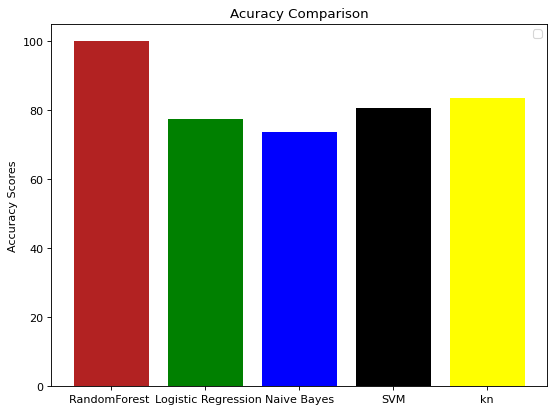

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x1 = np.array(["RandomForest ", "  Logistic Regression","Naive Bayes","SVM","kn"])
y1 = np.array([randomTrainAccuracy*100,logisticTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100,knTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Acuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow'])
plt.legend()
plt.show()

In [ ]:
!pip install matplotlib==3.4.2


     |████████████████████████████████| 10.3 MB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


AttributeError: ignored

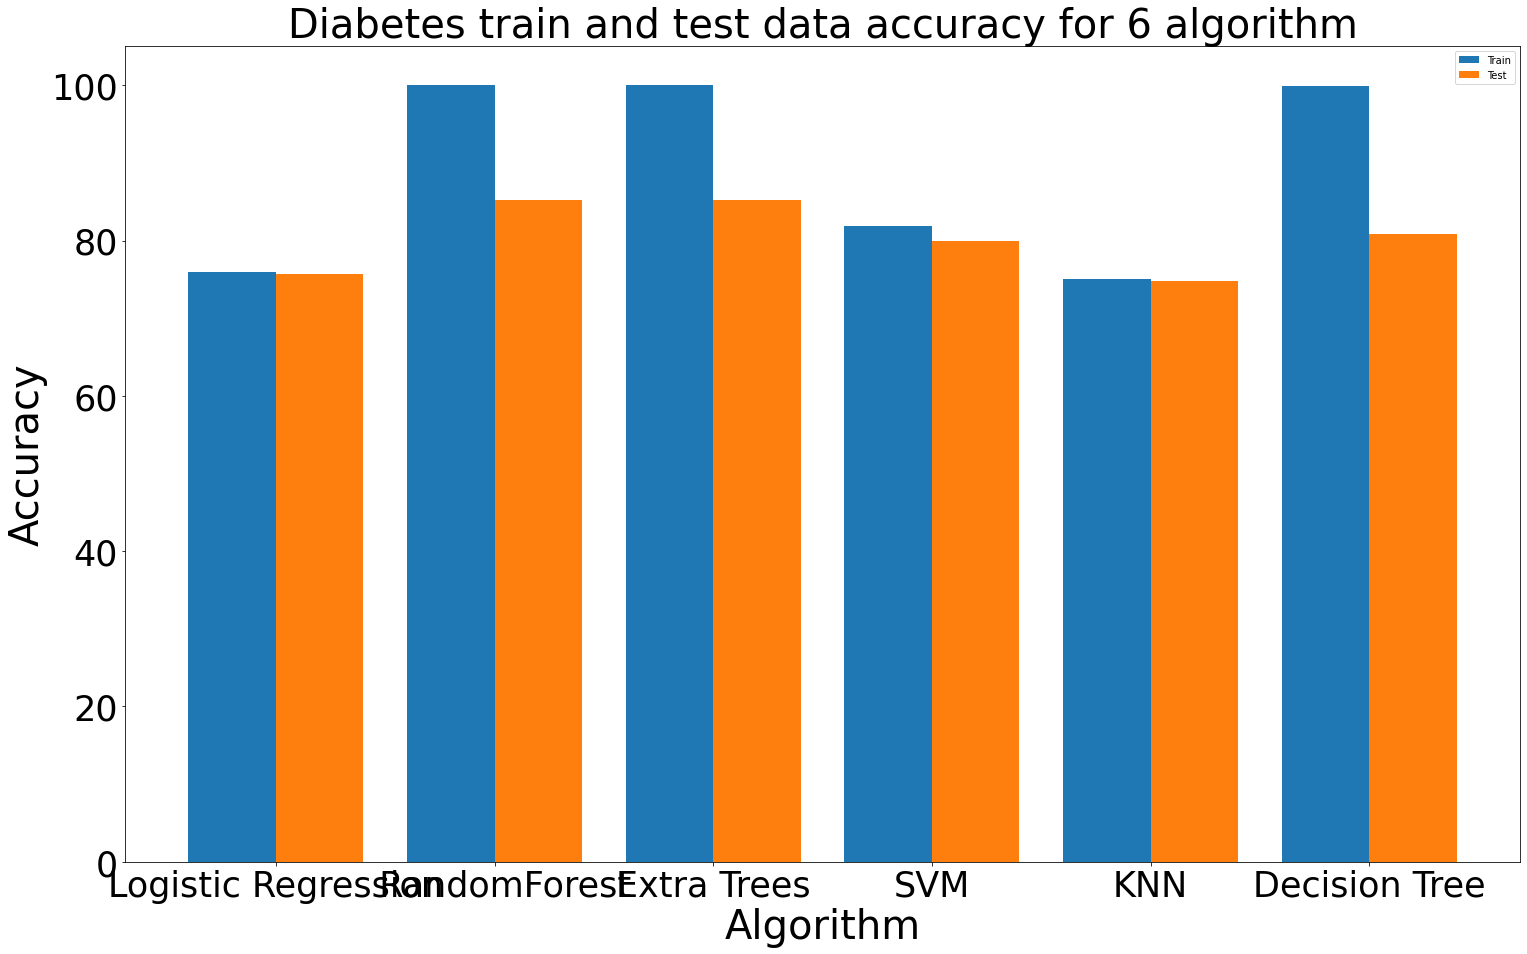

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Logistic Regression", "  RandomForest","Extra Trees","SVM","KNN","Decision Tree"]
train = [round(logisticTrainAccuracy*100,2), round(randomTrainAccuracy*100,2), round(etreeTrainAcc*100,2), round(svmTrainAccuracy*100,2), round(knTrainAccuracy*100,2),round(treeTrainAcc*100,2)]
test = [round(logisticTestAccuracy*100,2), round(randomTestAccuracy*100,2), round(etreeTestAcc*100,2), round(svmTestAccuracy*100,2), round(knTestAccuracy*100,2),round(treeTestAcc*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 15))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy',fontsize=40)
ax.set_xlabel('Algorithm',fontsize=40)
ax.set_title('Diabetes train and test data accuracy for 6 algorithm',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.tick_params(axis='both', labelsize=35)
ax.bar_label(rects1, padding=3,fontsize=40)
ax.bar_label(rects2, padding=3,fontsize=40)

fig.tight_layout()
plt.legend(fontsize=40)
plt.show()

# Performance analysis

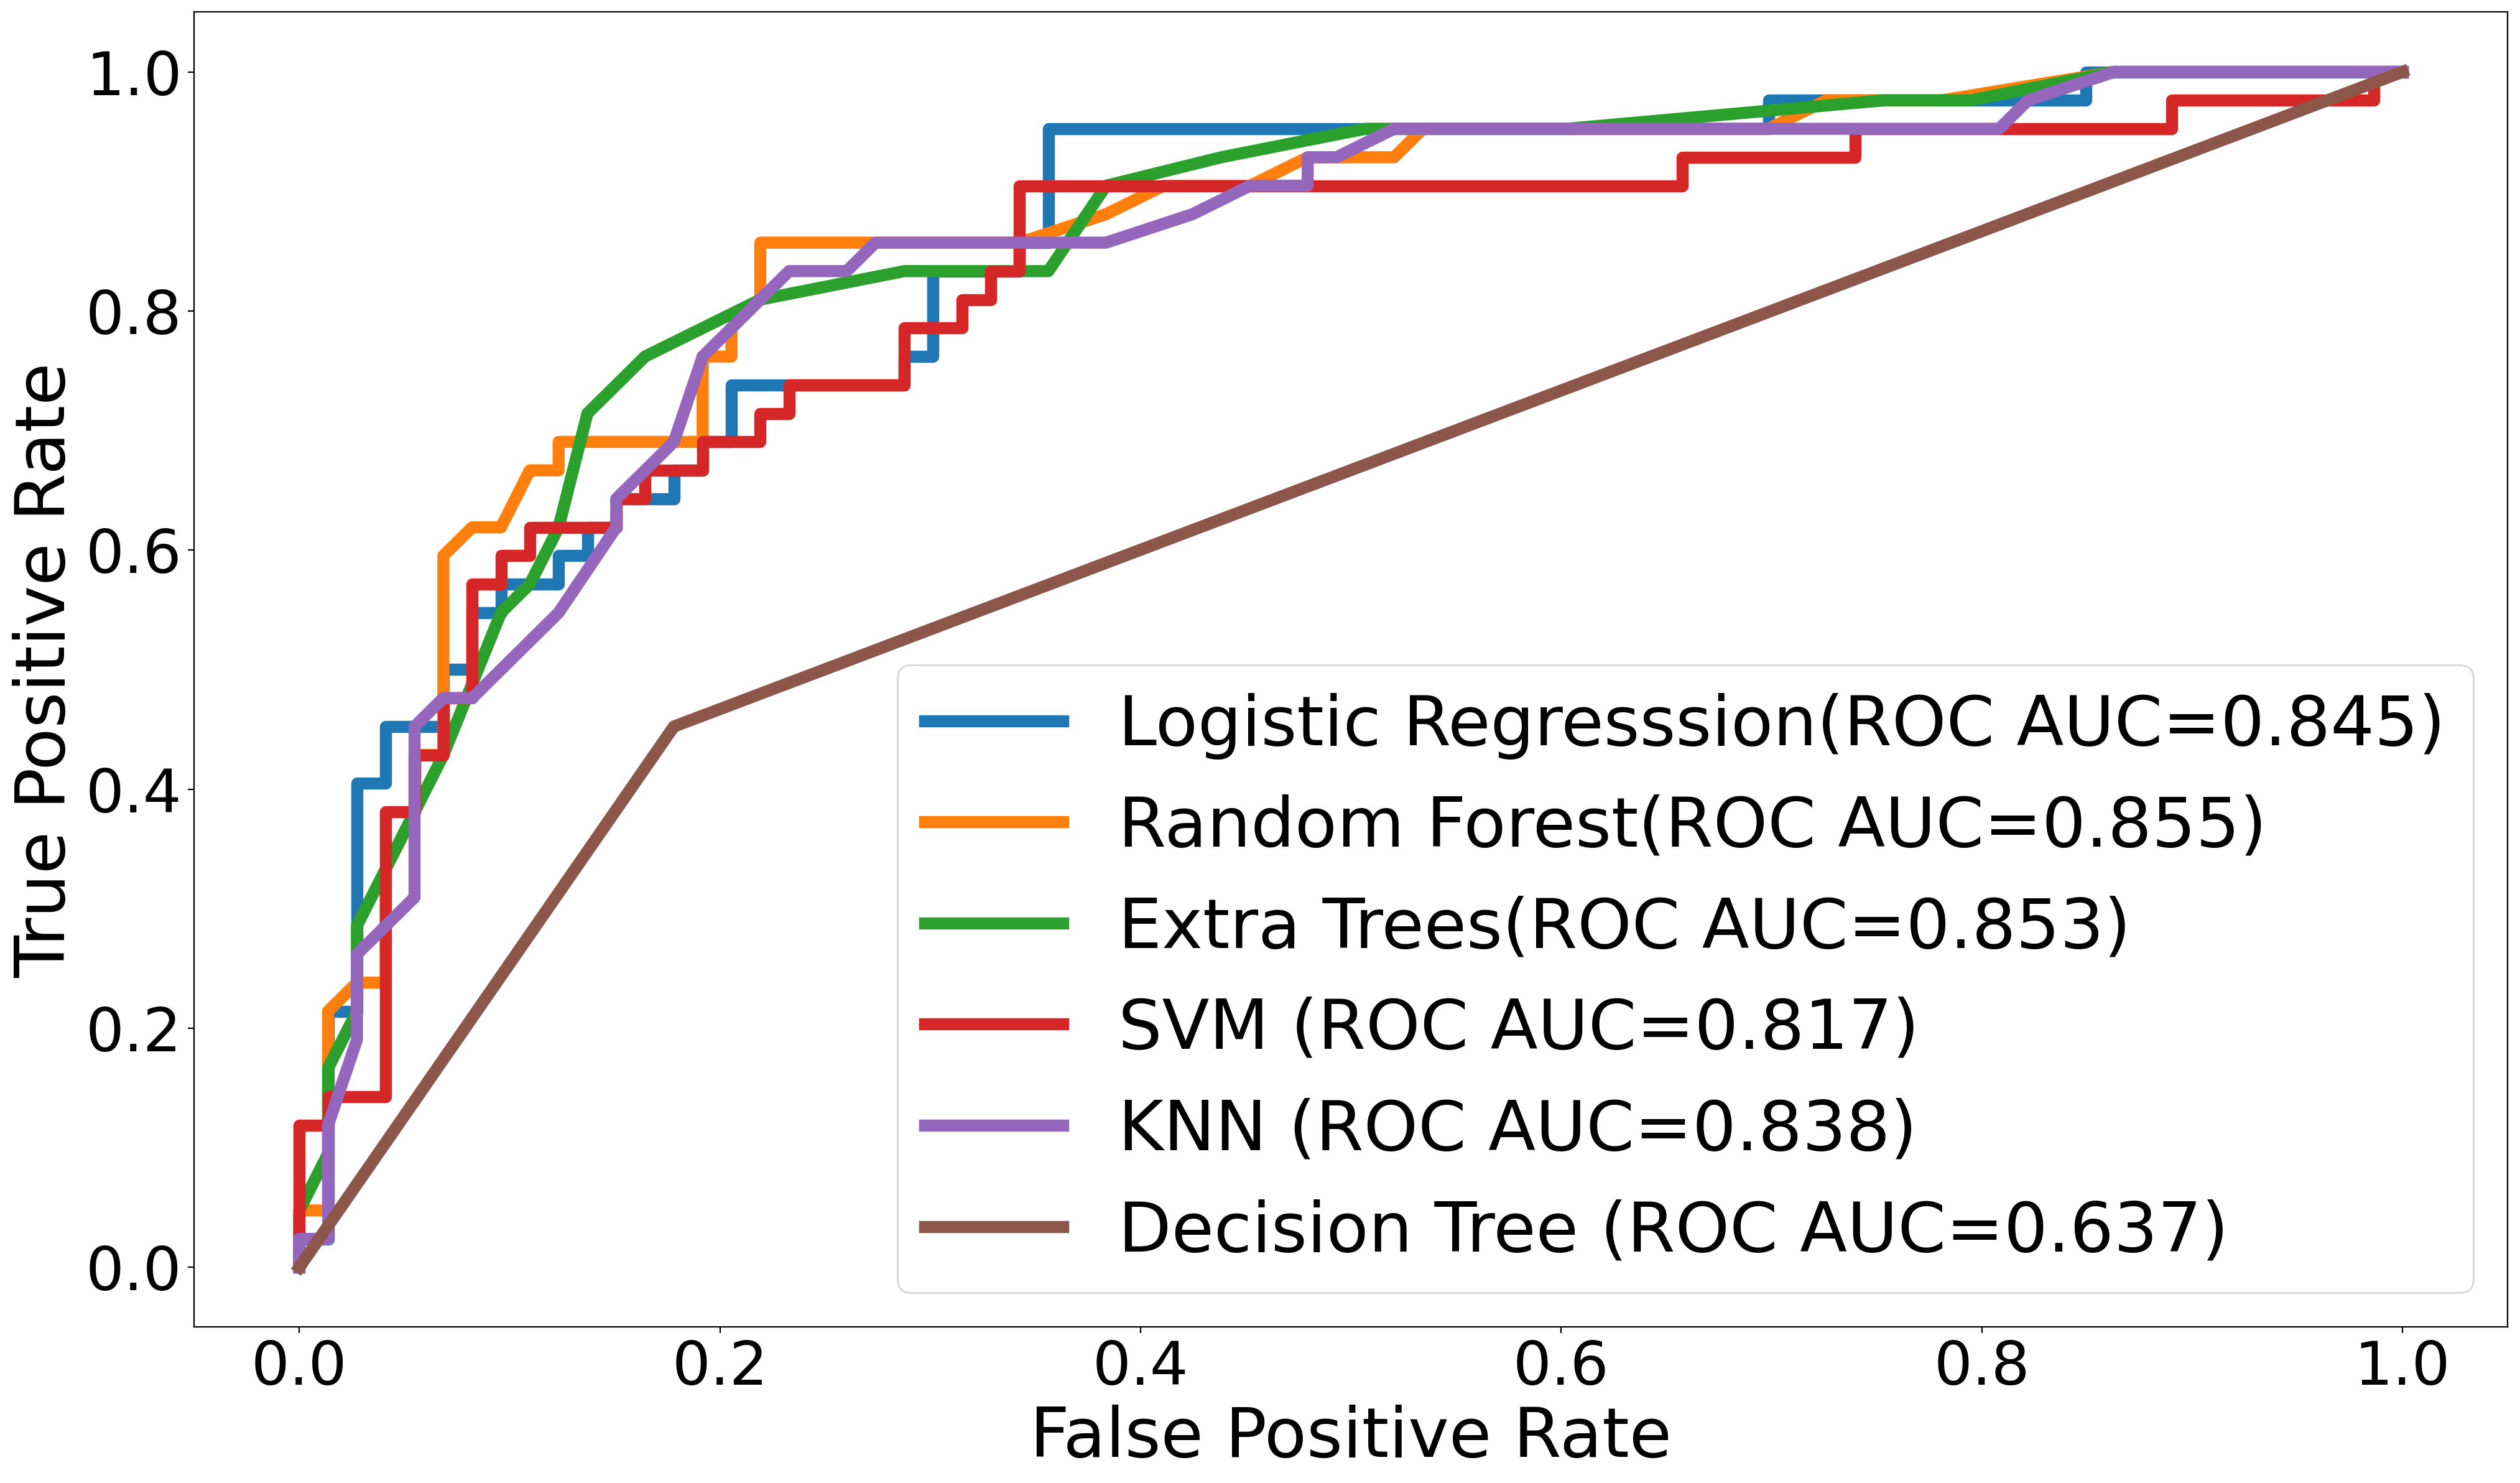

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(24, 14), dpi=200)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc),linewidth=7.0)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc),linewidth=7.0)
pyplot.plot(ex_fpr, ex_tpr, marker='.', label='Extra Trees(ROC AUC=%.3f)' % (ex_auc),linewidth=7.0)
pyplot.plot(sb_fpr, sb_tpr, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc),linewidth=7.0)
pyplot.plot(kn_fpr, kn_tpr, marker='.', label='KNN (ROC AUC=%.3f)' % (kn_auc),linewidth=7.0)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (ROC AUC=%.3f)' % (dt_auc),linewidth=7.0)
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=40)
pyplot.ylabel('True Positive Rate',fontsize=40)
# show the legend
pyplot.tick_params(axis='both', labelsize=35)
pyplot.legend(fontsize=40)
# show the plot
pyplot.show()

# classification_report

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regration")
print(logisticTrainAccuracy)
print(logisticTestAccuracy)
print(classification_report(ytest,Logpred))
print("Random Forest")
print(randomTrainAccuracy)
print(randomTestAccuracy)
print(classification_report(ytest,Randompred))
print("Extraa Trees")
print(etreeTrainAcc)
print(etreeTestAcc)
print(classification_report(ytest,predictionclf7))
print("SVM")
print(svmTrainAccuracy)
print(svmTestAccuracy)
print(classification_report(ytest,SVMpred))
print("KNN")
print(knTrainAccuracy)
print(knTestAccuracy)
print(classification_report(ytest,KNNpred))
print("Dicicision Tree")
print(treeTrainAcc)
print(treeTestAcc)
print(classification_report(ytest,predictionclf6))

Logistic Regration
0.7707692307692308
0.7652173913043478
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        73
           1       0.83      0.45      0.58        42

    accuracy                           0.77       115
   macro avg       0.79      0.70      0.71       115
weighted avg       0.78      0.77      0.74       115

Random Forest
1.0
0.8
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        73
           1       0.79      0.62      0.69        42

    accuracy                           0.80       115
   macro avg       0.80      0.76      0.77       115
weighted avg       0.80      0.80      0.79       115

Extraa Trees
1.0
0.7739130434782608
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        73
           1       0.77      0.55      0.64        42

    accuracy                           0.77       115
   macro avg 

# Save Model

In [ ]:

import joblib


In [ ]:
joblib.dump(model7,"diabetes_detector_ex")

['diabetes_detector_ex']

# Prediction

In [ ]:
to_predict = np.array([4,114.0,65.0,39.000000,179.500000,21.9,0.432,37]).reshape(1,8)
result=model7.predict(to_predict)
if(int(result[0])==1):
        print('Sorry ! You are Suffering Diabetes')
else:
        print('Congrats ! you are Healthy') 

Congrats ! you are Healthy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
np.save("xtrain_diabetes.npy",xtrain)

# Lime

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_smote_ex),
    feature_names=X_train_smote_ex.columns,
    mode='classification'
)

In [ ]:
xtest

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
460,9,120.0,72.0,22.000000,56.000000,20.8,0.733,48
151,4,114.0,65.0,39.000000,179.500000,21.9,0.432,37
745,12,100.0,84.0,33.000000,105.000000,30.0,0.488,46
529,0,111.0,65.0,24.500000,147.000000,24.6,0.660,31
403,9,72.0,78.0,25.000000,113.666667,31.6,0.280,38
...,...,...,...,...,...,...,...,...
754,8,154.0,78.0,32.000000,310.000000,32.4,0.443,45
337,5,115.0,76.0,37.000000,199.000000,31.2,0.343,44
355,9,165.0,88.0,30.666667,125.666667,30.4,0.302,49
723,5,117.0,86.0,30.000000,105.000000,39.1,0.251,42


In [ ]:
exp = interpretor.explain_instance(
    data_row=xtest.iloc[105], ##new data
    predict_fn=model7.predict_proba
)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names



In [ ]:
!pip install shapash

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(model=model7)

In [ ]:
xpl.compile(
    x=xtest,
   
)

In [ ]:
xpl.plot.features_importance(label=1)

In [ ]:
xpl.plot.compare_plot(row_num=[105, 20], label=1)